# Natural Language Processing - Machine Learning with Text Data
## Classification of an SMS message as spam/ham

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',header=None)
df = df.rename(columns={0: "class", 1: "abstract"})

In [3]:
df.head()

,class,abstract
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df

,class,abstract
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


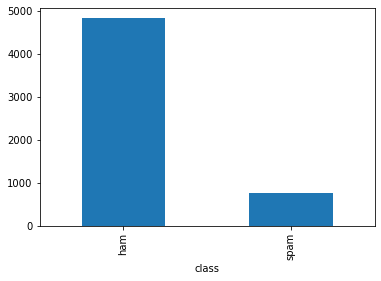

In [5]:
df.groupby('class').abstract.count().plot.bar(ylim=0)
plt.show()

In [6]:
df['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [7]:
baseline = 747/5572
baseline*100      #baseline accuracy


13.406317300789663

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mnjks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()
words = stopwords.words("english")

df['processedtext'] = df['abstract'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [10]:
df.head()

,class,abstract,processedtext
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i think goe usf live around though


In [11]:
from sklearn.model_selection import train_test_split

target = df['class']

X_train, X_test, y_train, y_test = train_test_split(df['processedtext'], target, test_size=0.30, random_state=50)

print(df.shape); print(X_train.shape); print(X_test.shape)

(5572, 3)
(3900,)
(1672,)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))

test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))

print(vectorizer_tfidf.get_feature_names()[:10])

['aah', 'aaniy', 'aathi', 'ab', 'abbey', 'abdomen', 'abeg', 'abel', 'aberdeen', 'abi']


In [13]:
print(train_tfIdf.shape); print(test_tfIdf.shape)

(3900, 5112)
(1672, 5112)


In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
#Multinomial Naive bayes for discrete feature classification
nb_classifier = MultinomialNB()

nb_classifier.fit(train_tfIdf, y_train)

pred2 = nb_classifier.predict(test_tfIdf) 
print(X_test[:10],pred2[:10])

3409    do want new nokia colour phone deliveredtomorr...
2103                              audri lousi autocorrect
2665                            he remain bro amongst bro
3239                               good no swimsuit allow
1205    win year suppli cd store ur choic worth enter ...
1295              aiyah u ok alreadi lar e nydc wheellock
1638    a network allow compani bill sm respons suppli...
251               ranjith cal drpd deeraj deepak min hold
1669                                           ye said it
4969    futur plan tomorrow result today do best prese...
Name: processedtext, dtype: object ['spam' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham']


In [15]:
df.iloc[251],df.iloc[3409]

(class                                                     ham
 abstract         Ranjith cal drpd Deeraj and deepak 5min hold
 processedtext         ranjith cal drpd deeraj deepak min hold
 Name: 251, dtype: object,
 class                                                         spam
 abstract         Do you want a New Nokia 3510i colour phone Del...
 processedtext    do want new nokia colour phone deliveredtomorr...
 Name: 3409, dtype: object)

In [16]:
accuracy_tfidf = metrics.accuracy_score(y_test, pred2)
print(accuracy_tfidf)

Conf_metrics_tfidf = metrics.confusion_matrix(y_test, pred2, labels=['ham', 'spam'])
print(Conf_metrics_tfidf)

0.97188995215311
[[1467    2]
 [  45  158]]


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 100)

classifier.fit(train_tfIdf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [18]:
predRF = classifier.predict(test_tfIdf) 
print(predRF[:10])

accuracy_RF = metrics.accuracy_score(y_test, predRF)
print(accuracy_RF)

Conf_metrics_RF = metrics.confusion_matrix(y_test, predRF, labels=['ham', 'spam'])
print(Conf_metrics_RF)

['spam' 'ham' 'ham' 'ham' 'spam' 'ham' 'ham' 'ham' 'ham' 'ham']
0.9742822966507177
[[1468    1]
 [  42  161]]


In [19]:
print("Accuracy with Naive bayes is {0}, and with Random FOrest Classifier is {1}".format(round(accuracy_tfidf*100,3),round(accuracy_RF*100,3)))

Accuracy with Naive bayes is 97.189, and with Random FOrest Classifier is 97.428
